In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [4]:
df = pd.read_csv("../dataset/EPL_2018-2025.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Season             2630 non-null   object
 1   MatchDate          2630 non-null   object
 2   HomeTeam           2630 non-null   object
 3   AwayTeam           2630 non-null   object
 4   FullTimeHomeGoals  2630 non-null   int64 
 5   FullTimeAwayGoals  2630 non-null   int64 
 6   FullTimeResult     2630 non-null   object
 7   HalfTimeHomeGoals  2630 non-null   int64 
 8   HalfTimeAwayGoals  2630 non-null   int64 
 9   HalfTimeResult     2630 non-null   object
 10  HomeShots          2630 non-null   int64 
 11  AwayShots          2630 non-null   int64 
 12  HomeShotsOnTarget  2630 non-null   int64 
 13  AwayShotsOnTarget  2630 non-null   int64 
 14  HomeCorners        2630 non-null   int64 
 15  AwayCorners        2630 non-null   int64 
 16  HomeFouls          2630 non-null   int64 


In [9]:
print(df.shape)

(2630, 22)


FullTimeResult
H    1163
A     876
D     591
Name: count, dtype: int64


/tmp/ipykernel_6622/3753771765.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='FullTimeResult', order=['H', 'D', 'A'], palette='viridis')


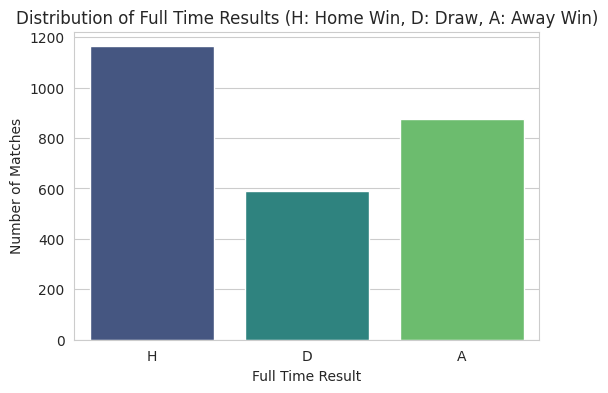


Percentage Distribution:
FullTimeResult
H    44.220532
A    33.307985
D    22.471483
Name: proportion, dtype: float64


In [10]:
print(df['FullTimeResult'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='FullTimeResult', order=['H', 'D', 'A'], palette='viridis')
plt.title('Distribution of Full Time Results (H: Home Win, D: Draw, A: Away Win)')
plt.xlabel('Full Time Result')
plt.ylabel('Number of Matches')
plt.show()

print("\nPercentage Distribution:")
print(df['FullTimeResult'].value_counts(normalize=True) * 100)

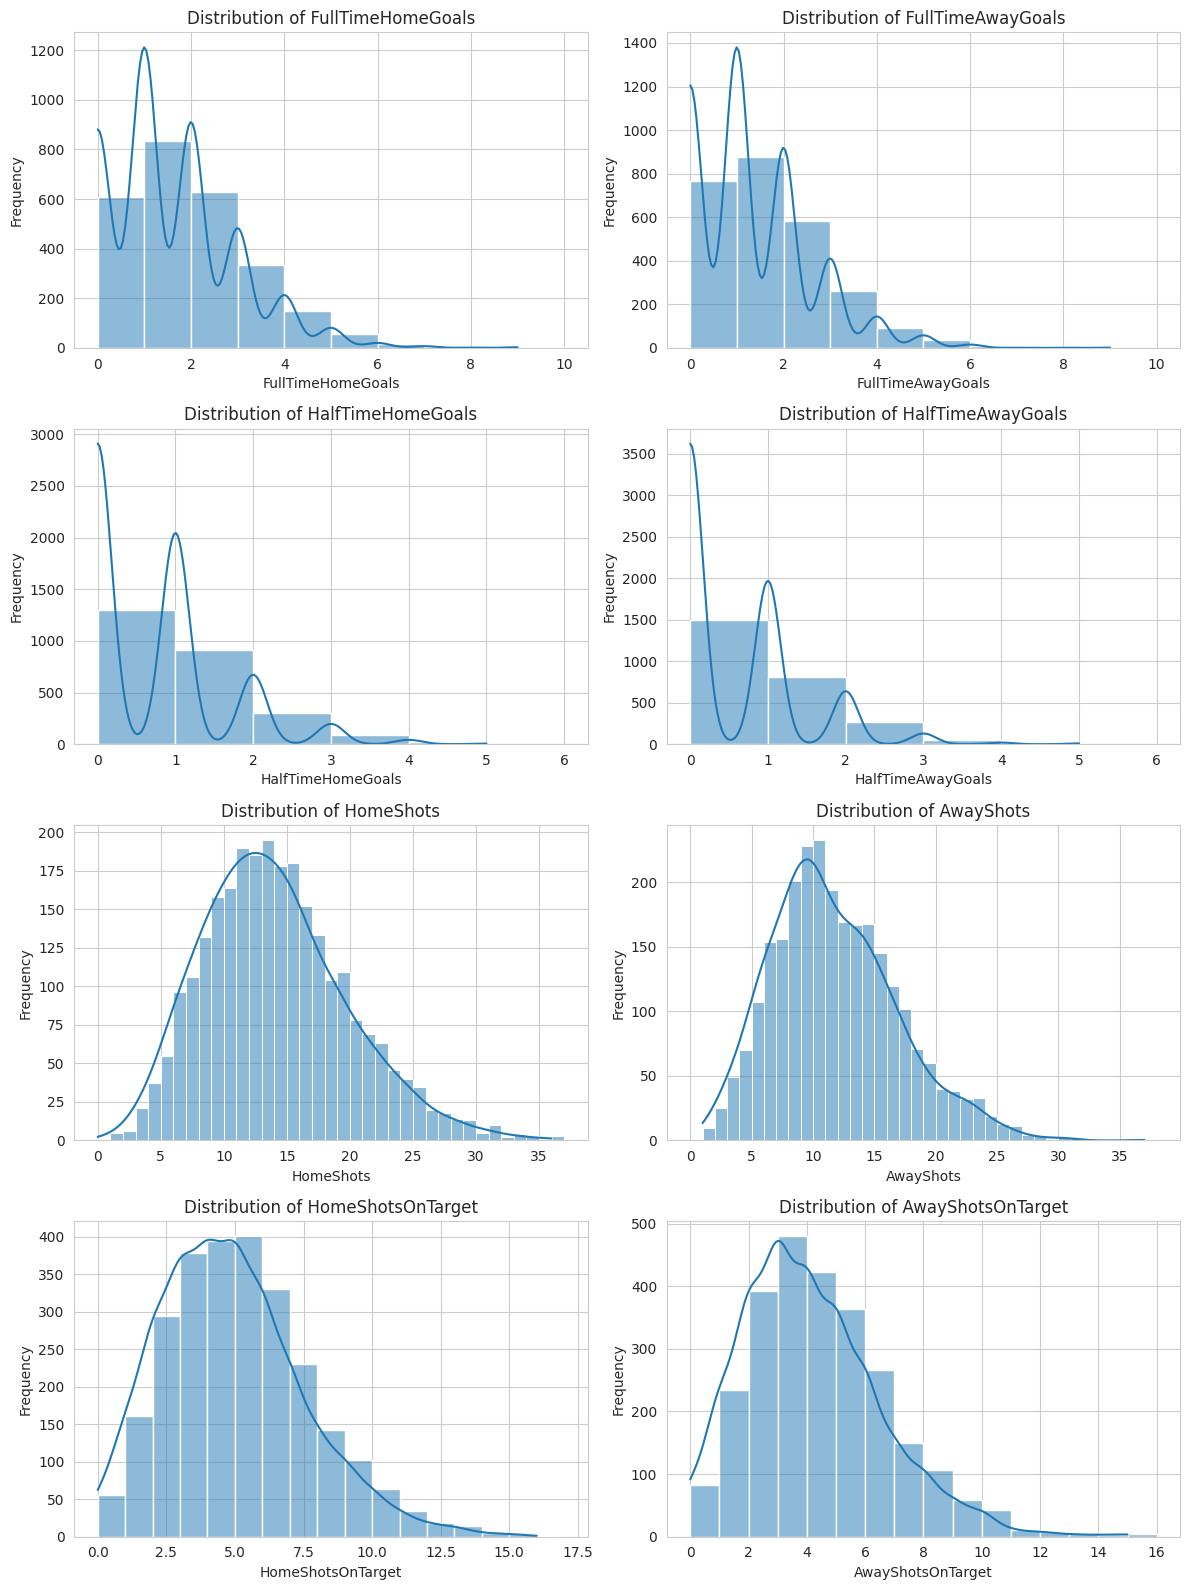

/tmp/ipykernel_6622/717851045.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipykernel_6622/717851045.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipykernel_6622/717851045.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipykernel_6622/717851045.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` 

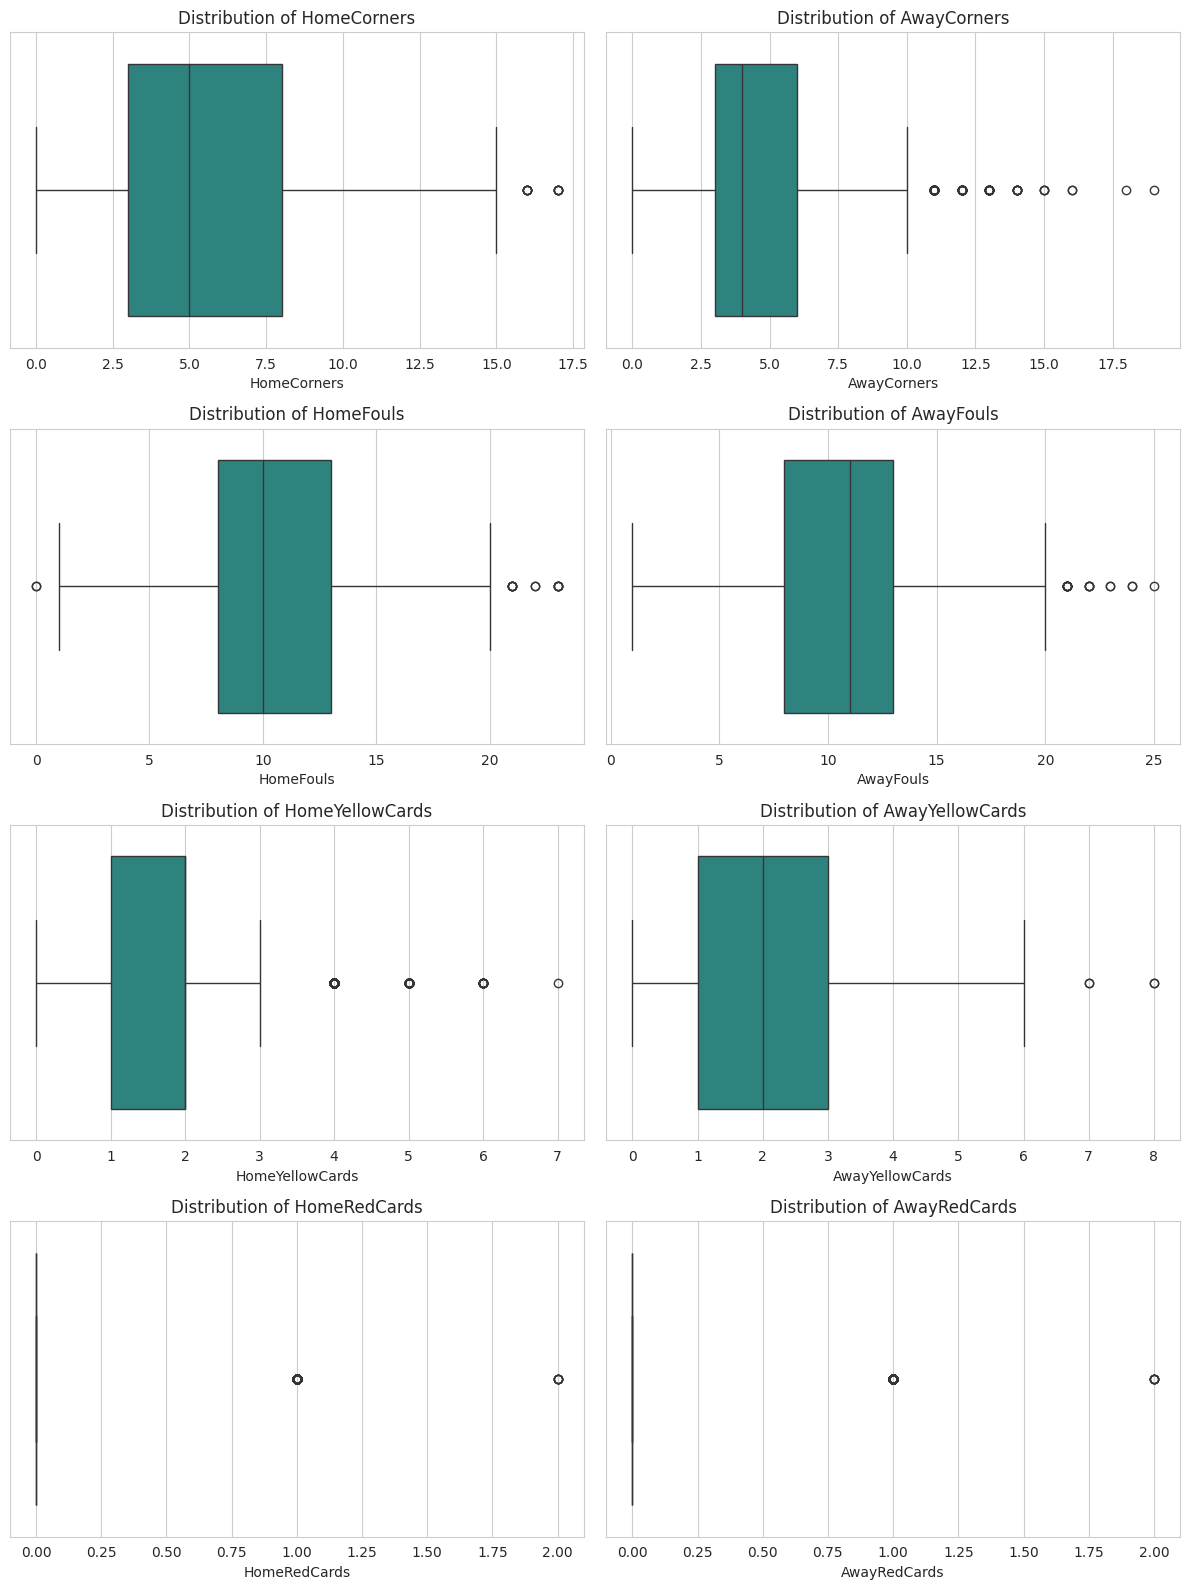

In [11]:
numerical_cols = [
    'FullTimeHomeGoals', 'FullTimeAwayGoals',
    'HalfTimeHomeGoals', 'HalfTimeAwayGoals',
    'HomeShots', 'AwayShots',
    'HomeShotsOnTarget', 'AwayShotsOnTarget',
    'HomeCorners', 'AwayCorners',
    'HomeFouls', 'AwayFouls',
    'HomeYellowCards', 'AwayYellowCards',
    'HomeRedCards', 'AwayRedCards'
]
goal_shot_cols = [
    'FullTimeHomeGoals', 'FullTimeAwayGoals',
    'HalfTimeHomeGoals', 'HalfTimeAwayGoals',
    'HomeShots', 'AwayShots',
    'HomeShotsOnTarget', 'AwayShotsOnTarget'
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()

for i, col in enumerate(goal_shot_cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=range(int(df[col].max()) + 2))
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()
other_stats_cols = [
    'HomeCorners', 'AwayCorners',
    'HomeFouls', 'AwayFouls',
    'HomeYellowCards', 'AwayYellowCards',
    'HomeRedCards', 'AwayRedCards'
]

for i, col in enumerate(other_stats_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

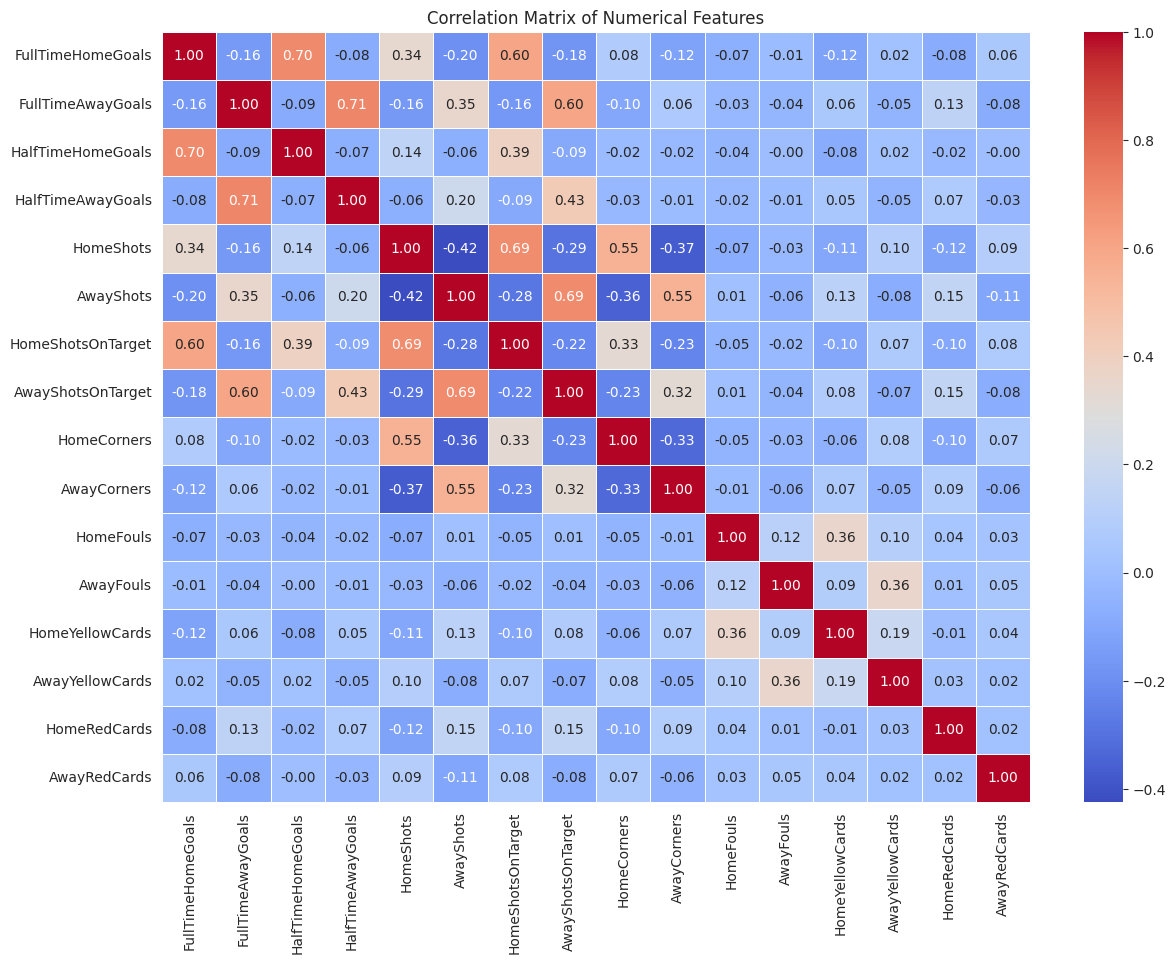

In [12]:
numerical_df = df[numerical_cols]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Average numerical stats per Full Time Result:
FullTimeResult             A          D          H
FullTimeHomeGoals   0.574201   1.086294   2.544282
FullTimeAwayGoals   2.434932   1.086294   0.593293
HalfTimeHomeGoals   0.288813   0.519459   1.128977
HalfTimeAwayGoals   1.073059   0.451777   0.293207
HomeShots          11.922374  13.793570  15.429923
AwayShots          13.538813  11.774958  10.066208
HomeShotsOnTarget   3.480594   4.385787   6.049871
AwayShotsOnTarget   5.542237   3.915398   3.112640
HomeCorners         5.263699   5.803723   5.961307
AwayCorners         5.033105   4.768190   4.448839
HomeFouls          10.579909  10.808799  10.464316
AwayFouls          10.518265  11.197970  10.809114
HomeYellowCards     1.737443   1.829103   1.533104
AwayYellowCards     1.742009   1.993232   1.865864
HomeRedCards        0.094749   0.049069   0.029235
AwayRedCards        0.031963   0.074450   0.079966


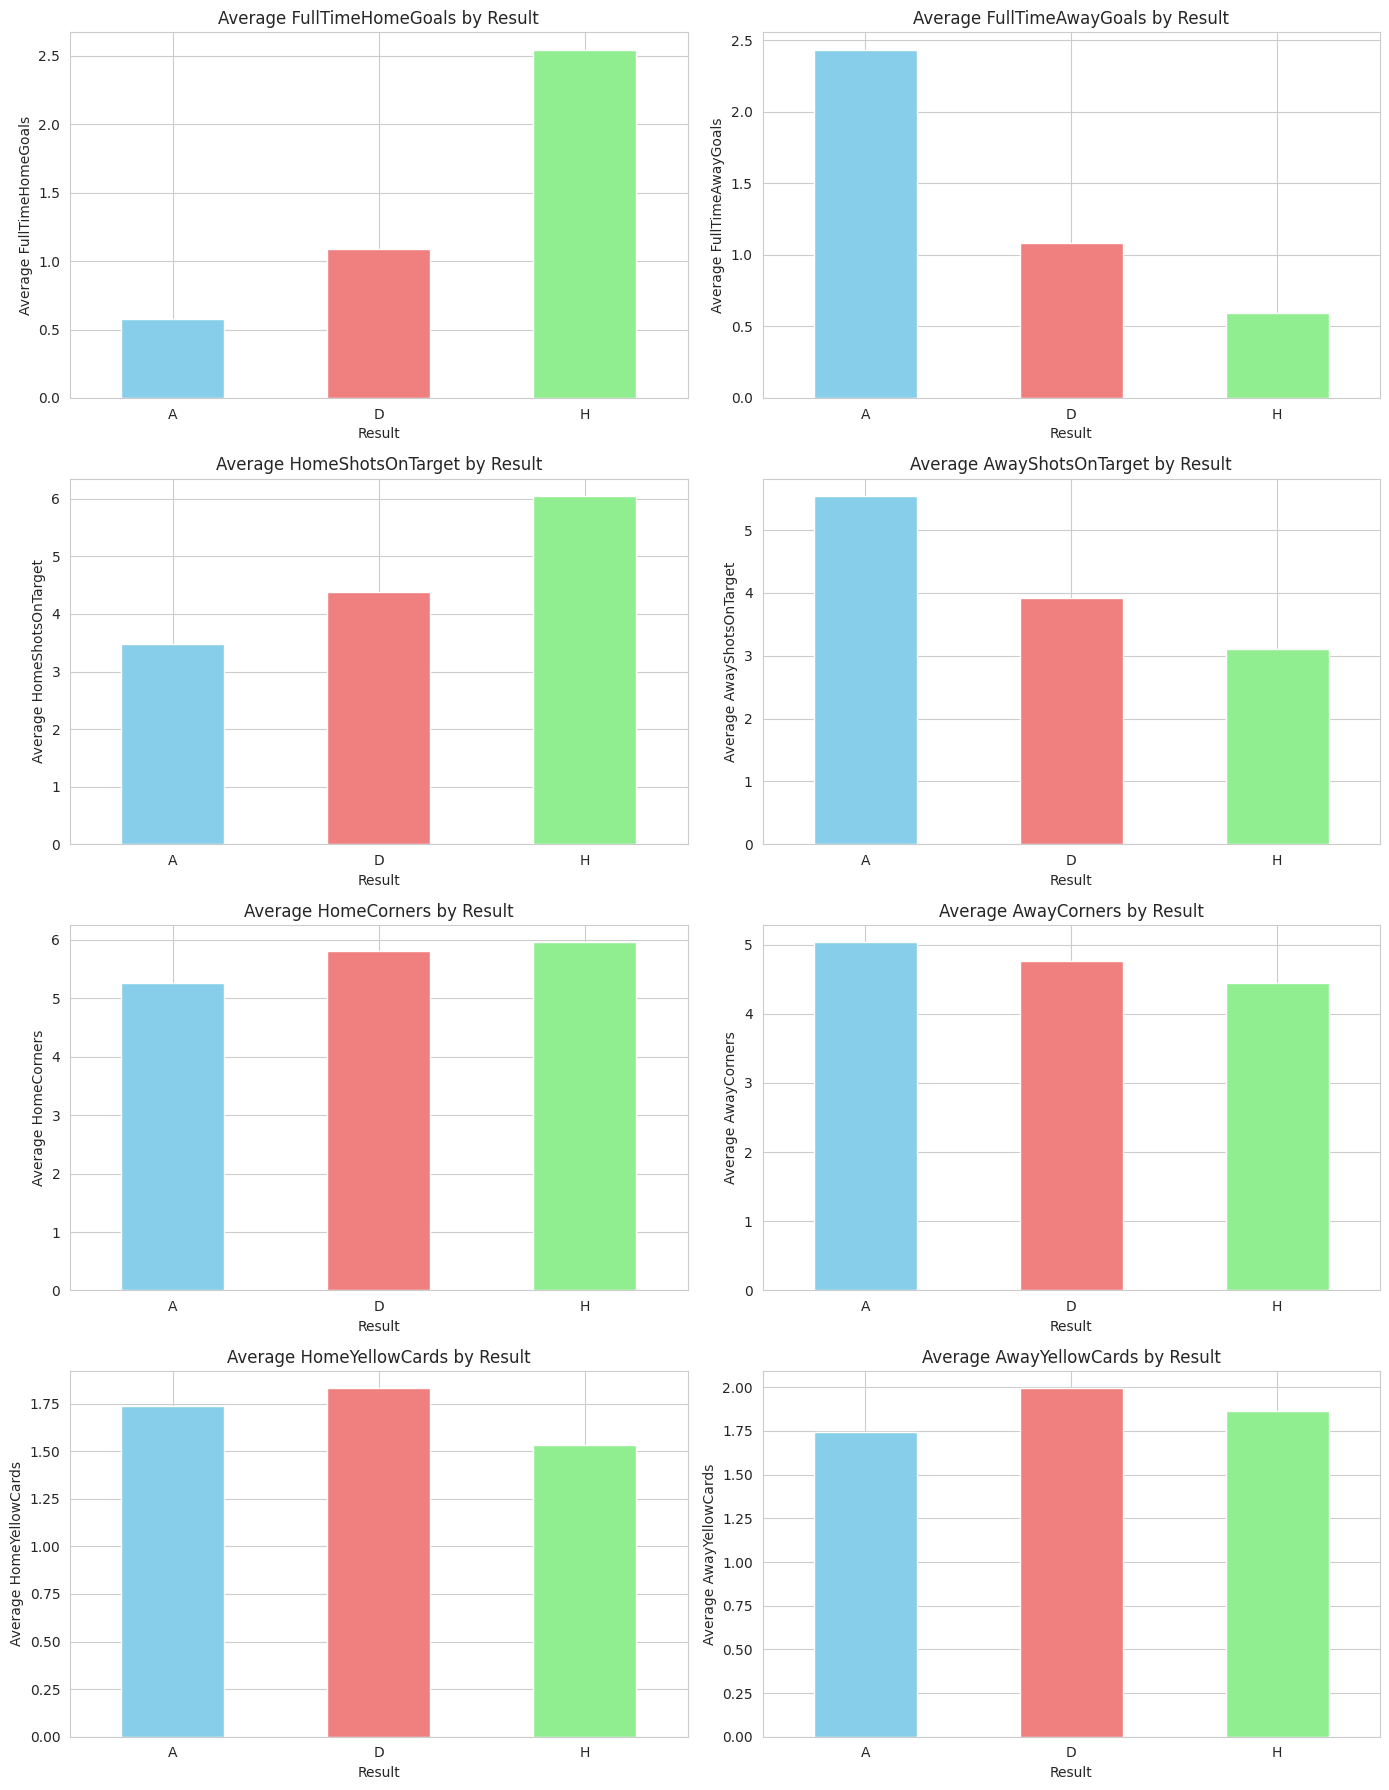

In [13]:
result_grouped_means = df.groupby('FullTimeResult')[numerical_cols].mean().T 

print("Average numerical stats per Full Time Result:")
print(result_grouped_means)

key_stats_to_compare = [
    'FullTimeHomeGoals', 'FullTimeAwayGoals',
    'HomeShotsOnTarget', 'AwayShotsOnTarget',
    'HomeCorners', 'AwayCorners',
    'HomeYellowCards', 'AwayYellowCards' 
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for i, stat in enumerate(key_stats_to_compare):
    result_grouped_means.loc[stat].plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[i].set_title(f'Average {stat} by Result')
    axes[i].set_xlabel('Result')
    axes[i].set_ylabel(f'Average {stat}')
    axes[i].tick_params(axis='x', rotation=0) 

plt.tight_layout()
plt.show()

Cross-tabulation of Half Time Result vs Full Time Result:
FullTimeResult         A         D         H
HalfTimeResult                              
A               0.722222  0.158120  0.119658
D               0.303150  0.327756  0.369094
H               0.066886  0.161184  0.771930


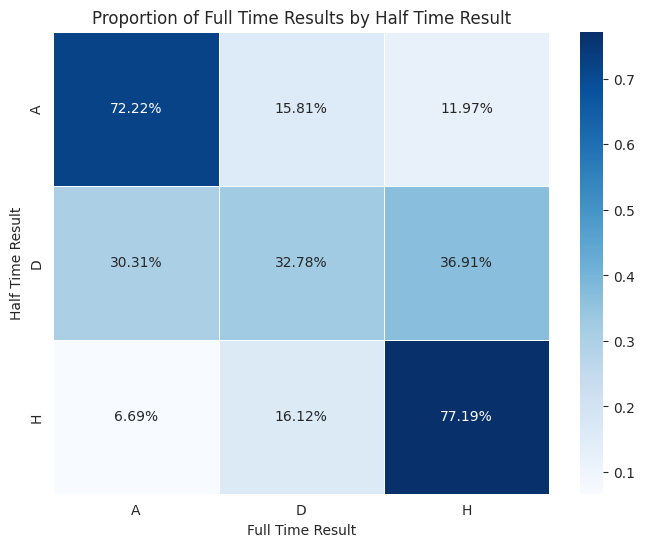


Raw counts:
FullTimeResult    A    D    H
HalfTimeResult               
A               507  111   84
D               308  333  375
H                61  147  704


In [14]:
# Cell 6: Relationship between Half-Time and Full-Time Results

print("Cross-tabulation of Half Time Result vs Full Time Result:")
ht_ft_crosstab = pd.crosstab(df['HalfTimeResult'], df['FullTimeResult'], normalize='index') # Normalize by index to get proportions per HT result
print(ht_ft_crosstab)

# Visualize the cross-tabulation
plt.figure(figsize=(8, 6))
sns.heatmap(ht_ft_crosstab, annot=True, cmap='Blues', fmt=".2%", linewidths=.5)
plt.title('Proportion of Full Time Results by Half Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Half Time Result')
plt.show()

print("\nRaw counts:")
print(pd.crosstab(df['HalfTimeResult'], df['FullTimeResult']))

In [15]:
# Cell 7: Summary of Findings and Next Steps for ML

print("--- Summary of Exploratory Data Analysis ---")
print("\nTarget Variable: FullTimeResult (H/A/D)")
print("  - The target variable is somewhat imbalanced, with Home Wins being the most frequent outcome.")
print("  - This is typical for football data and should be considered during model evaluation (e.g., using precision/recall/F1-score in addition to accuracy) and potentially modeling (e.g., class weighting).")

print("\nNumerical Features:")
print("  - Distributions of goals, shots, etc., are as expected (mostly skewed towards lower values).")
print("  - Correlation matrix shows relationships *between* features (e.g., shots and shots on target are highly correlated). This can help identify potential multicollinearity, but isn't direct feature importance for the target.")

print("\nFeatures Related to Target:")
print("  - Analyzing mean stats by outcome reveals strong predictors:")
print("    - Goal counts (HomeGoals, AwayGoals) are most directly tied to the result.")
print("    - Shot and Shot-on-Target counts also show clear differences based on outcome.")
print("    - Other stats like corners, fouls, cards show weaker but potentially useful patterns.")
print("  - The Half-Time Result is a very strong predictor of the Full-Time Result.")

print("\nPromising Features for ML Model:")
print("  - Features directly related to match performance: Goals (FT & HT), Shots (FT & HT), Shots on Target (FT & HT).")
print("  - Half-Time Result.")
print("  - Potentially other stats like corners, fouls, cards, though their predictive power needs testing.")

print("\nNext Steps for Building the ML Model:")
print("1. Feature Engineering:")
print("   - Create potentially useful features: Goal difference (FT & HT), Shot difference (FT & HT), Shots on Target difference (FT & HT).")
print("   - Team strength metrics: Need to handle HomeTeam and AwayTeam. This is crucial but complex. Simple approaches could involve calculating historical average goals scored/conceded, form (recent results), etc. This dataset spans multiple seasons, so time-based features (e.g., average goals in the last 5 matches) are powerful but require careful implementation.")
print("   - Convert MatchDate to datetime and potentially extract features (e.g., day of week - less likely important for EPL, but maybe holiday matches differ).")
print("2. Preprocessing:")
print("   - Encode categorical features: HalfTimeResult (One-Hot Encoding). HomeTeam and AwayTeam will require more advanced handling (like the team strength features mentioned above, or potentially entity embeddings if using deep learning).")
print("   - Scaling: Numerical features might need scaling (StandardScaler, MinMaxScaler) depending on the chosen model.")
print("3. Model Selection:")
print("   - Classification models suitable for this task: Logistic Regression, Support Vector Machines (SVM), Tree-based models (Decision Tree, Random Forest, Gradient Boosting like XGBoost/LightGBM).")
print("   - Consider simpler models first (Logistic Regression, Random Forest) before trying more complex ones.")
print("4. Model Training and Evaluation:")
print("   - Split data into training and testing sets (chronological split is often better for time-series data like this, or at least ensuring test set matches are strictly *after* train set matches).")
print("   - Train the model.")
print("   - Evaluate using appropriate metrics (Accuracy, Precision, Recall, F1-score, Confusion Matrix). Consider using cross-validation.")
print("5. Hyperparameter Tuning:")
print("   - Optimize model performance.")
print("6. Deployment:")
print("   - Save the trained model.")
print("   - Build a FastAPI application to serve predictions.")

print("\nThis EDA has given us good insights into the data and helped identify promising features and the necessary preprocessing steps.")

--- Summary of Exploratory Data Analysis ---

Target Variable: FullTimeResult (H/A/D)
  - The target variable is somewhat imbalanced, with Home Wins being the most frequent outcome.
  - This is typical for football data and should be considered during model evaluation (e.g., using precision/recall/F1-score in addition to accuracy) and potentially modeling (e.g., class weighting).

Numerical Features:
  - Distributions of goals, shots, etc., are as expected (mostly skewed towards lower values).
  - Correlation matrix shows relationships *between* features (e.g., shots and shots on target are highly correlated). This can help identify potential multicollinearity, but isn't direct feature importance for the target.

Features Related to Target:
  - Analyzing mean stats by outcome reveals strong predictors:
    - Goal counts (HomeGoals, AwayGoals) are most directly tied to the result.
    - Shot and Shot-on-Target counts also show clear differences based on outcome.
    - Other stats like c

In [16]:
# Cell 8: Basic Difference Features

print("Creating difference features...")

df['FTRedCardsDiff'] = df['HomeRedCards'] - df['AwayRedCards']
df['FTYellowCardsDiff'] = df['HomeYellowCards'] - df['AwayYellowCards']
df['FTFoulsDiff'] = df['HomeFouls'] - df['AwayFouls']
df['FTCornersDiff'] = df['HomeCorners'] - df['AwayCorners']
df['FTShotsOnTargetDiff'] = df['HomeShotsOnTarget'] - df['AwayShotsOnTarget']
df['FTShotsDiff'] = df['HomeShots'] - df['AwayShots']
df['FTHGDiff'] = df['FullTimeHomeGoals'] - df['FullTimeAwayGoals'] # This is essentially the margin, strongly related to target
df['HTHGDiff'] = df['HalfTimeHomeGoals'] - df['HalfTimeAwayGoals']

print("Difference features created.")
print("\nDataFrame head with new features:")
print(df[['HomeTeam', 'AwayTeam', 'FTHGDiff', 'HTHGDiff', 'FTShotsDiff', 'FTCornersDiff']].head())

Creating difference features...
Difference features created.

DataFrame head with new features:
       HomeTeam        AwayTeam  FTHGDiff  HTHGDiff  FTShotsDiff  \
0    Man United       Leicester         1         1           -5   
1   Bournemouth         Cardiff         2         1            2   
2        Fulham  Crystal Palace        -2        -1            5   
3  Huddersfield         Chelsea        -3        -2           -7   
4     Newcastle       Tottenham        -1        -1            0   

   FTCornersDiff  
0             -3  
1              3  
2              0  
3             -3  
4             -2  


In [17]:
# Cell 9: Handle MatchDate and Sort Data

print("Converting MatchDate to datetime and sorting data...")

df['MatchDate'] = pd.to_datetime(df['MatchDate'])

# Sort the DataFrame by date to ensure chronological order for time-based feature engineering
df = df.sort_values(by='MatchDate').reset_index(drop=True)

print("MatchDate converted and data sorted.")
print("\nDataFrame head after sorting:")
print(df[['Season', 'MatchDate', 'HomeTeam', 'AwayTeam']].head())

print("\nDataFrame info after date conversion:")
df.info()

Converting MatchDate to datetime and sorting data...
MatchDate converted and data sorted.

DataFrame head after sorting:
    Season  MatchDate      HomeTeam        AwayTeam
0  2018/19 2018-08-10    Man United       Leicester
1  2018/19 2018-08-11   Bournemouth         Cardiff
2  2018/19 2018-08-11        Fulham  Crystal Palace
3  2018/19 2018-08-11  Huddersfield         Chelsea
4  2018/19 2018-08-11     Newcastle       Tottenham

DataFrame info after date conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Season               2630 non-null   object        
 1   MatchDate            2630 non-null   datetime64[ns]
 2   HomeTeam             2630 non-null   object        
 3   AwayTeam             2630 non-null   object        
 4   FullTimeHomeGoals    2630 non-null   int64         
 5   FullTimeAwayGoals

In [19]:
# New Cell: Install tqdm
!pip install tqdm

print("tqdm installed. Please re-run the previous cell (Cell 10).")

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
tqdm installed. Please re-run the previous cell (Cell 10).


In [22]:
# Cell 10 (Corrected): Implementing Team Strength/Form Features (Rolling Averages)

print("Calculating team strength/form features (rolling averages)...")

# Define the window size for rolling averages (e.g., last 5 matches)
ROLLING_WINDOW = 5

# --- Refined get_rolling_stats function including Points and location-specific stats ---
# This function takes the full sorted dataframe, team name, match date, window size,
# and whether to filter for home/away/overall past matches.
def get_rolling_stats_refined(team, match_date, df_sorted, window_size, location_filter=None):
    # Filter matches for the specific team occurring BEFORE the match_date
    # Using .copy() to avoid potential SettingWithCopyWarning
    team_matches = df_sorted[df_sorted['MatchDate'] < match_date].copy()

    # Filter for matches involving the specific team
    team_matches_filtered = team_matches[(team_matches['HomeTeam'] == team) | (team_matches['AwayTeam'] == team)]

    if location_filter == 'Home':
        # Filter for matches where the team played HOME in the past
        team_matches_filtered = team_matches_filtered[team_matches_filtered['HomeTeam'] == team]
    elif location_filter == 'Away':
         # Filter for matches where the team played AWAY in the past
        team_matches_filtered = team_matches_filtered[team_matches_filtered['AwayTeam'] == team]
    # If location_filter is None, use all team matches (overall)


    # Sort by date again (should already be sorted, but double check for safety)
    # and select the last 'window_size' matches
    recent_matches = team_matches_filtered.sort_values(by='MatchDate').tail(window_size)

    if recent_matches.empty:
        return {} # Return empty if no previous matches found within the criteria

    stats = {}
    # Calculate points for each match from the perspective of the 'team'
    # Ensure these columns exist and are not NaN for calculation
    valid_matches = recent_matches.dropna(subset=['FullTimeResult', 'HomeTeam', 'AwayTeam'])

    if valid_matches.empty:
         stats['Points'] = np.nan # Cannot calculate points if results are missing
    else:
        points = valid_matches.apply(lambda row:
            3 if (row['HomeTeam'] == team and row['FullTimeResult'] == 'H') or \
                 (row['AwayTeam'] == team and row['FullTimeResult'] == 'A') else \
            1 if row['FullTimeResult'] == 'D' else \
            0, axis=1)
        stats['Points'] = points.mean()

    # Calculate Goals Scored and Conceded from the perspective of the 'team' in these recent matches
    # Use original goal columns, ensure they exist
    if not recent_matches.dropna(subset=['FullTimeHomeGoals', 'FullTimeAwayGoals']).empty:
        stats['GoalsScored'] = recent_matches.apply(lambda row: row['FullTimeHomeGoals'] if row['HomeTeam'] == team else row['FullTimeAwayGoals'], axis=1).mean()
        stats['GoalsConceded'] = recent_matches.apply(lambda row: row['FullTimeAwayGoals'] if row['HomeTeam'] == team else row['FullTimeHomeGoals'], axis=1).mean()
    else:
        stats['GoalsScored'] = np.nan
        stats['GoalsConceded'] = np.nan


    # Calculate other stats from the perspective of the 'team'
    for col in ['Shots', 'ShotsOnTarget', 'Corners', 'Fouls', 'YellowCards', 'RedCards']:
        home_col = f'Home{col}'
        away_col = f'Away{col}'
        if home_col in recent_matches.columns and away_col in recent_matches.columns:
             stats[col] = recent_matches.apply(lambda row: row[home_col] if row['HomeTeam'] == team else row[away_col], axis=1).mean()
        else:
             stats[col] = np.nan


    return stats

# Apply the rolling stat calculation row by row
# Ensure tqdm is imported and enabled if you want the progress bar
try:
    from tqdm.notebook import tqdm # Import tqdm for progress bar
    tqdm.pandas() # Enable pandas integration
    use_progress_bar = True
except ImportError:
    print("tqdm.notebook not found. Install with 'pip install tqdm' for progress bar.")
    use_progress_bar = False

rolling_stats_list = []

# Iterate through the sorted DataFrame
iterator = df.iterrows()
if use_progress_bar:
    iterator = tqdm(df.iterrows(), total=df.shape[0], desc=f"Calculating {ROLLING_WINDOW}-Match Rolling Stats")

for index, row in iterator:
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_date = row['MatchDate']

    # Calculate stats for Home Team (based on their past Home games and Overall games)
    # Pass the main df directly. The function's filtering handles the history.
    home_team_home_stats = get_rolling_stats_refined(home_team, match_date, df, ROLLING_WINDOW, location_filter='Home')
    home_team_overall_stats = get_rolling_stats_refined(home_team, match_date, df, ROLLING_WINDOW, location_filter=None) # Overall form

    # Calculate stats for Away Team (based on their past Away games and Overall games)
    # Pass the main df directly.
    away_team_away_stats = get_rolling_stats_refined(away_team, match_date, df, ROLLING_WINDOW, location_filter='Away')
    away_team_overall_stats = get_rolling_stats_refined(away_team, match_date, df, ROLLING_WINDOW, location_filter=None) # Overall form


    # Store the calculated stats for this match
    match_stats = {
        # Keep these for merging later, but they won't be prediction features
        'HomeTeam': home_team,
        'AwayTeam': away_team,
        'MatchDate': match_date,
        # Home team form stats for THIS match (playing at Home) based on past Home games
        f'HomeAvgLast{ROLLING_WINDOW}_GoalsScored_Home': home_team_home_stats.get('GoalsScored', np.nan),
        f'HomeAvgLast{ROLLING_WINDOW}_GoalsConceded_Home': home_team_home_stats.get('GoalsConceded', np.nan),
        f'HomeAvgLast{ROLLING_WINDOW}_ShotsOnTarget_Home': home_team_home_stats.get('ShotsOnTarget', np.nan),
        f'HomeAvgLast{ROLLING_WINDOW}_Corners_Home': home_team_home_stats.get('Corners', np.nan),
        f'HomeAvgLast{ROLLING_WINDOW}_YellowCards_Home': home_team_home_stats.get('YellowCards', np.nan),
        f'HomeAvgLast{ROLLING_WINDOW}_Points_Home': home_team_home_stats.get('Points', np.nan), # Points from last N *home* games

        # Away team form stats for THIS match (playing Away) based on past Away games
        f'AwayAvgLast{ROLLING_WINDOW}_GoalsScored_Away': away_team_away_stats.get('GoalsScored', np.nan),
        f'AwayAvgLast{ROLLING_WINDOW}_GoalsConceded_Away': away_team_away_stats.get('GoalsConceded', np.nan),
        f'AwayAvgLast{ROLLING_WINDOW}_ShotsOnTarget_Away': away_team_away_stats.get('ShotsOnTarget', np.nan),
        f'AwayAvgLast{ROLLING_WINDOW}_Corners_Away': away_team_away_stats.get('Corners', np.nan),
        f'AwayAvgLast{ROLLING_WINDOW}_YellowCards_Away': away_team_away_stats.get('YellowCards', np.nan),
        f'AwayAvgLast{ROLLING_WINDOW}_Points_Away': away_team_away_stats.get('Points', np.nan), # Points from last N *away* games

        # Overall form stats (less location specific, might be useful for general form)
        f'HomeAvgLast{ROLLING_WINDOW}_GoalsScored_Overall': home_team_overall_stats.get('GoalsScored', np.nan),
        f'HomeAvgLast{ROLLING_WINDOW}_GoalsConceded_Overall': home_team_overall_stats.get('GoalsConceded', np.nan),
        f'HomeAvgLast{ROLLING_WINDOW}_ShotsOnTarget_Overall': home_team_overall_stats.get('ShotsOnTarget', np.nan),
        f'HomeAvgLast{ROLLING_WINDOW}_Points_Overall': home_team_overall_stats.get('Points', np.nan), # Points from last N *overall* games

        f'AwayAvgLast{ROLLING_WINDOW}_GoalsScored_Overall': away_team_overall_stats.get('GoalsScored', np.nan),
        f'AwayAvgLast{ROLLING_WINDOW}_GoalsConceded_Overall': away_team_overall_stats.get('GoalsConceded', np.nan),
        f'AwayAvgLast{ROLLING_WINDOW}_ShotsOnTarget_Overall': away_team_overall_stats.get('ShotsOnTarget', np.nan),
        f'AwayAvgLast{ROLLING_WINDOW}_Points_Overall': away_team_overall_stats.get('Points', np.nan), # Points from last N *overall* games

        # Combine home team attack at home vs away team defense away features
        f'HomeAttack_vs_AwayDefense_{ROLLING_WINDOW}Avg': home_team_home_stats.get('GoalsScored', np.nan) - away_team_away_stats.get('GoalsConceded', np.nan),
        f'AwayAttack_vs_HomeDefense_{ROLLING_WINDOW}Avg': away_team_away_stats.get('GoalsScored', np.nan) - home_team_home_stats.get('GoalsConceded', np.nan),
    }
    rolling_stats_list.append(match_stats)

# Create a DataFrame from the list of calculated stats
rolling_stats_df = pd.DataFrame(rolling_stats_list)

# Merge the rolling stats back into the original DataFrame
# Merge based on the index after ensuring both are sorted the same way
# We already sorted df by date. rolling_stats_df is built in that order.
# Drop the merge keys from rolling_stats_df before joining on index
rolling_stats_df = rolling_stats_df.drop(columns=['HomeTeam', 'AwayTeam', 'MatchDate'])

# Merge using left_index=True, right_index=True
df = pd.merge(df, rolling_stats_df, left_index=True, right_index=True, how='left')


print(f"Rolling average features ({ROLLING_WINDOW} matches) created.")
print("\nDataFrame head with rolling average features:")
# Displaying a selection of the new features
rolling_cols_display = [col for col in df.columns if f'AvgLast{ROLLING_WINDOW}' in col][:15] # Display first 15
print(df[['HomeTeam', 'AwayTeam', 'MatchDate'] + rolling_cols_display].head())

print("\nCheck for NaNs in new rolling features (expected for early matches):")
# Use the actual column names from the dataframe after merge
actual_rolling_cols = [col for col in df.columns if f'AvgLast{ROLLING_WINDOW}' in col]
print(df[actual_rolling_cols].isnull().sum())

Calculating team strength/form features (rolling averages)...


Calculating 5-Match Rolling Stats:   0%|          | 0/2630 [00:00<?, ?it/s]

Rolling average features (5 matches) created.

DataFrame head with rolling average features:
       HomeTeam        AwayTeam  MatchDate  HomeAvgLast5_Goals  \
0    Man United       Leicester 2018-08-10                 NaN   
1   Bournemouth         Cardiff 2018-08-11                 NaN   
2        Fulham  Crystal Palace 2018-08-11                 NaN   
3  Huddersfield         Chelsea 2018-08-11                 NaN   
4     Newcastle       Tottenham 2018-08-11                 NaN   

   HomeAvgLast5_Shots  HomeAvgLast5_ShotsOnTarget  HomeAvgLast5_Corners  \
0                 NaN                         NaN                   NaN   
1                 NaN                         NaN                   NaN   
2                 NaN                         NaN                   NaN   
3                 NaN                         NaN                   NaN   
4                 NaN                         NaN                   NaN   

   HomeAvgLast5_YellowCards  HomeAvgLast5_RedCards  AwayAvg

In [23]:
print("Encoding HalfTimeResult using One-Hot Encoding...")

# Apply one-hot encoding
ht_result_encoded = pd.get_dummies(df['HalfTimeResult'], prefix='HTResult', drop_first=False) # Use drop_first=False initially

# Concatenate the new encoded columns to the original DataFrame
df = pd.concat([df, ht_result_encoded], axis=1)

print("HalfTimeResult encoded.")
print("\nDataFrame head with encoded HTResult features:")
print(df[['HalfTimeResult', 'HTResult_H', 'HTResult_D', 'HTResult_A']].head())

print("\nCheck info for new columns:")
df.info()

Encoding HalfTimeResult using One-Hot Encoding...
HalfTimeResult encoded.

DataFrame head with encoded HTResult features:
  HalfTimeResult  HTResult_H  HTResult_D  HTResult_A
0              H        True       False       False
1              H        True       False       False
2              A       False       False        True
3              A       False       False        True
4              A       False       False        True

Check info for new columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Columns: 119 entries, Season to HTResult_H
dtypes: bool(3), datetime64[ns](1), float64(86), int64(24), object(5)
memory usage: 2.3+ MB


In [24]:
print("Selecting features and handling missing values...")

TARGET = 'FullTimeResult'
y = df[TARGET]
pre_match_numerical_cols = [
    'HomeShots', 'AwayShots',
    'HomeShotsOnTarget', 'AwayShotsOnTarget',
    'HomeCorners', 'AwayCorners',
    'HomeFouls', 'AwayFouls',
    'HomeYellowCards', 'AwayYellowCards',
    'HomeRedCards', 'AwayRedCards'
]

# Basic Difference features
basic_diff_cols = [
    'FTRedCardsDiff', 'FTYellowCardsDiff', 'FTFoulsDiff',
    'FTCornersDiff', 'FTShotsOnTargetDiff', 'FTShotsDiff']

encoded_ht_cols = [col for col in df.columns if 'HTResult_' in col]
rolling_avg_cols = [col for col in df.columns if f'AvgLast{ROLLING_WINDOW}' in col]
features = pre_match_numerical_cols + basic_diff_cols + encoded_ht_cols + rolling_avg_cols

X = df[features]

print("\nSelected Features:")
print(features)

print("\nShape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

print(f"\nNumber of rows before handling NaNs: {len(X)}")
X_cleaned = X.dropna()
y_cleaned = y.loc[X_cleaned.index]

print(f"Number of rows after handling NaNs: {len(X_cleaned)}")
print(f"Number of rows dropped: {len(X) - len(X_cleaned)}")

X = X_cleaned
y = y_cleaned

print("\nFinal shape of features (X):", X.shape)
print("Final shape of target (y):", y.shape)

print("\nChecking for remaining NaNs in features:")
print(X.isnull().sum().sum()) # Should be 0

Selecting features and handling missing values...

Selected Features:
['HomeShots', 'AwayShots', 'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners', 'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards', 'AwayRedCards', 'FTRedCardsDiff', 'FTYellowCardsDiff', 'FTFoulsDiff', 'FTCornersDiff', 'FTShotsOnTargetDiff', 'FTShotsDiff', 'HTResult_A', 'HTResult_D', 'HTResult_H', 'HomeAvgLast5_Goals', 'HomeAvgLast5_Shots', 'HomeAvgLast5_ShotsOnTarget', 'HomeAvgLast5_Corners', 'HomeAvgLast5_YellowCards', 'HomeAvgLast5_RedCards', 'AwayAvgLast5_Goals', 'AwayAvgLast5_Shots', 'AwayAvgLast5_ShotsOnTarget', 'AwayAvgLast5_Corners', 'AwayAvgLast5_YellowCards', 'AwayAvgLast5_RedCards', 'HomeAvgLast5_GoalsScored', 'HomeAvgLast5_GoalsConceded', 'AwayAvgLast5_GoalsScored', 'AwayAvgLast5_GoalsConceded', 'HomeAvgLast5_GoalsScored_Home_x', 'HomeAvgLast5_GoalsConceded_Home_x', 'HomeAvgLast5_ShotsOnTarget_Home_x', 'HomeAvgLast5_Corners_Home_x', 'HomeAvgLast5_YellowCards_

In [25]:
# Cell 13: Final Data Check Before Modeling

print("Final data check before modeling:")
print("\nFeatures (X) Info:")
X.info()

print("\nFeatures (X) Head:")
print(X.head())

print("\nTarget (y) Info:")
y.info()

print("\nTarget (y) Head:")
print(y.head())

print("\nValue counts of target (y):")
print(y.value_counts())

Final data check before modeling:

Features (X) Info:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 101 entries, HomeShots to AwayAvgLast5_Points_Overall
dtypes: bool(3), float64(80), int64(18)
memory usage: 0.0 bytes

Features (X) Head:
Empty DataFrame
Columns: [HomeShots, AwayShots, HomeShotsOnTarget, AwayShotsOnTarget, HomeCorners, AwayCorners, HomeFouls, AwayFouls, HomeYellowCards, AwayYellowCards, HomeRedCards, AwayRedCards, FTRedCardsDiff, FTYellowCardsDiff, FTFoulsDiff, FTCornersDiff, FTShotsOnTargetDiff, FTShotsDiff, HTResult_A, HTResult_D, HTResult_H, HomeAvgLast5_Goals, HomeAvgLast5_Shots, HomeAvgLast5_ShotsOnTarget, HomeAvgLast5_Corners, HomeAvgLast5_YellowCards, HomeAvgLast5_RedCards, AwayAvgLast5_Goals, AwayAvgLast5_Shots, AwayAvgLast5_ShotsOnTarget, AwayAvgLast5_Corners, AwayAvgLast5_YellowCards, AwayAvgLast5_RedCards, HomeAvgLast5_GoalsScored, HomeAvgLast5_GoalsConceded, AwayAvgLast5_GoalsScored, AwayAvgLast5_GoalsConceded, HomeAvgLast5_GoalsScored_Home